<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/%5BNLP_%EC%96%B8%EC%A0%9C%EA%B9%8C%EC%A7%80_%EB%AF%B8%EB%A3%B0%EB%9E%98__%EC%9D%BC%EB%8B%A8_%EB%93%A4%EC%96%B4%EC%99%80!!%5D_3_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 571 kB/s 
     |████████████████████████████████| 448 kB 73.5 MB/s 


*총 5개의 노트북으로 시작하는 자연어 처리 입문 튜토리얼*


*이번 대회와 함께 그간 미루고 있었던 NLP, 지금 시작해보세요!!*

1. 자연어 처리란?


2. NLP Preprocessing


### 3. Vectorization <<<<




4. Embedding


5. Modeling



---

## Vectorization 이란?

* NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것을 말합니다.이 때 벡터로 변환된 고유의 토큰들이 모인 집합을 vocabulary 하며 vocabulary가 크면 클수록 학습이 오래 걸리게 됩니다. 다양한 벡터화 함수들이 존재하지만 이번 노트북에서는 가장 기본적이며 많이 쓰이는 세 가지를 소개하겠습니다.



* 이전 노트북에서 소개했던 것과 마찬가지로 토큰들을 벡터화하기 이전에 형태소 분석기를 사용하여 문장을 원하는 토큰들로 분리합니다. 자세한 내용은 이전 노트북을 참고해주세요([#2. NLP 전처리](https://dacon.io/competitions/official/235658/codeshare/1808?page=1&dtype=recent&ptype=pub))




> Ex) 자연어 처리는 정말 즐거워. 즐거운 자연어 처리 다같이 해보자

위의 문장들을 간단한 전처리와 okt를 활용하여 나누어보겠습니다.

In [2]:
from konlpy.tag import Okt
import re

Okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
    sentence = re.sub('[^가-힣a-z]', ' ', sentence) #간단한 전처리
    token = (Okt.morphs(sentence)) #형태소 분석기를 이용햔 토큰 나누기
    tokens.append(' '.join(token))

print("형태소 단위로 문장 분리")
print("----------------------")
print(tokens)

형태소 단위로 문장 분리
----------------------
['자연어 처리 는 정말 정말 즐거워', '즐거운 자연어 처리 다 같이 해보자']


---

### 1. One Hot Encoding

* 두번째 노트북에서 설명드렸던 방식이 바로 one-hot-encoding입니다. 해당 단어가 존재하면 1, 그렇지 않으면 모두 0으로 표시되는 기법입니다. keras를 이용하면 쉽게 구현이 가능하며 texts_to_sequences를 활용해 각 토큰에 고유한 정수를 부여한 후 to_categorical을 활용하면 간단하게 구현이 가능합니다.


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

t = Tokenizer()
t.fit_on_texts(tokens)
print("각 토큰에게 고유의 정수 부여")
print("----------------------")
print(t.word_index) 
print(" ")

s1=t.texts_to_sequences(tokens)[0] 
print("부여된 정수로 표시된 문장1")
print("----------------------")
print(s1)
print(" ")

s2=t.texts_to_sequences(tokens)[1]
print("부여된 정수로 표시된 문장2")
print("----------------------")
print(s2)
print(" ")

s1_one_hot = to_categorical(s1)
print("문장1의 one-hot-encoding")
print("----------------------")
print(s1_one_hot)
print(" ")

s2_one_hot = to_categorical(s2)
print("문장2의 one-hot-encoding")
print("----------------------")
print(s2_one_hot)

각 토큰에게 고유의 정수 부여
----------------------
{'자연어': 1, '처리': 2, '정말': 3, '는': 4, '즐거워': 5, '즐거운': 6, '다': 7, '같이': 8, '해보자': 9}
 
부여된 정수로 표시된 문장1
----------------------
[1, 2, 4, 3, 3, 5]
 
부여된 정수로 표시된 문장2
----------------------
[6, 1, 2, 7, 8, 9]
 
문장1의 one-hot-encoding
----------------------
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
 
문장2의 one-hot-encoding
----------------------
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


* 하지만 이 방식은 vocabulary 크기가 커짐에 따라 많은 공간을 차지하게 되고 벡터가 굉장히 sparse해지기 때문에 모델에게 좋은 특성을 알려주지 못하는 경우가 대부분입니다. 

---

## 2.Count vectorization

* 이 방식은 vocabulary를 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization 해줍니다. 아래 예시를 통해 알아봅시다

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens) #여러 개의 문장을 넣어줘야 작동합니다!!

print(vectorizer.get_feature_names())
print(vectors.toarray())

['같이', '자연어', '정말', '즐거운', '즐거워', '처리', '해보자']
[[0 1 2 0 1 1 0]
 [1 1 0 1 0 1 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


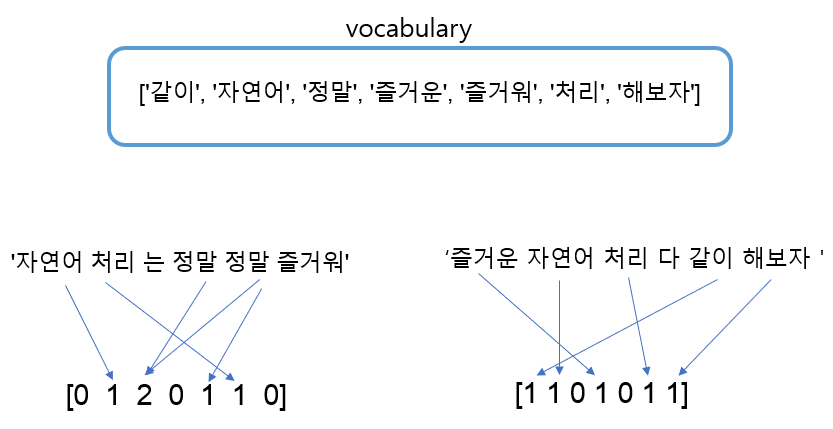</img><br/>

* 벡터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시된 것을 알 수 있습니다.  
아쉬운 점은 sklearn의 CountVectorizer는 한 글자는 자동으로 제거해주네요



* <span style="color:red"> 또한, 이 부분에서 형태소 분석기의 중요성에 대해서 알 수 있습니다. 즐거운과 즐거워는 같은 의미를 갖는 토큰이지만 okt는 이를 구분해주지 못해서 다른 토큰으로 분리가 되었습니다. 이는 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미합니다. </span>

---

## 3. TfIdf

* TfIdf의 핵심은 다음의 두 가지 입니다.

1. 단어가 몇번 등장 했는지에 대한 정보
2.어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는데 있어서 중요한 단어

> 즉 등장 횟수도 많고 문서 분별력 있는 단어들을 점수화하여 벡터화를 한 것이 TfIdf 기법입니다.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens) 

#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

['같이', '자연어', '정말', '즐거운', '즐거워', '처리', '해보자']
[[0.         0.29017021 0.81564821 0.         0.4078241  0.29017021
  0.        ]
 [0.49922133 0.35520009 0.         0.49922133 0.         0.35520009
  0.49922133]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


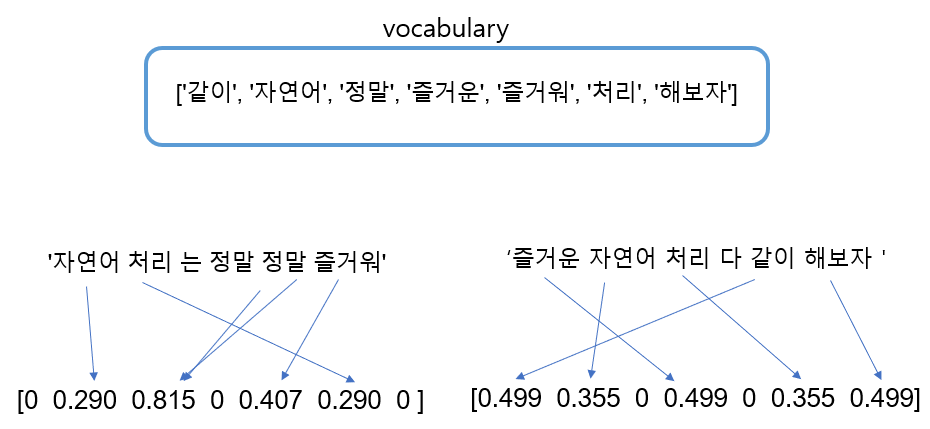</img><br/>

* 이번 노트북에서는 수식적인 부분은 제외하고 코드위주의 결과를 공유하겠습니다. Count Vectorization과 동일한 방법이지만 단어들에 대한 가중치가 다르게 표시됩니다. TfIdf에 대한 상세한 내용은 다음 링크를 참고하세요.([TfIdf](https://donghwa-kim.github.io/TFIDF.html))

---

## 4. Padding

* 여기서 우리는 한 가지 궁금증이 생기게 됩니다. 우리가 사용하던 모델들은 DataFrame 형식의 row별 동일한 colum수를 갖는데 NLP에서는 row별(문장별) colum(토큰의 개수)가 같지 않아도 되는건가? 가변 길이의 문장들을 입력으로 넣어도 된다고?



* 가변 길이의 입력을 받는 모형들이 존재하지만 아쉽게도 기본적으로는 문장의 길이를 동일하게 맞춰주어야 합니다. 문장의 길이를 맞춰주기 위해 부족한 길이만큼 0을 채워넣게 되는데 우리는 이것을 Padding라고 부릅니다. 

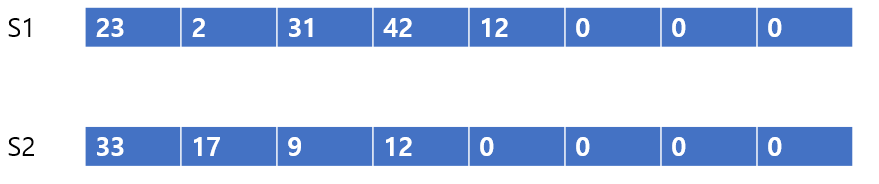</img><br/>

* 위의 예시와 같이 문장 S1의 길이와 S2의 길이가 서로 다를 때 뒤쪽에 0을 padding해주어 같은 길이로 맞춰줍니다. padding은 kears에서 한 줄로 구현이 가능하며 대회 적용 코드에서 살펴보도록 하겠습니다.

---

## 5. 대회 적용

* 아래 코드는 이번 대회에 바로 적용 가능한 코드입니다. 이번 대회에서는 특별한 vectorization 기법을 사용하지 않고 keras의 texts_to_sequences를 통한 정수화만 진행해 주어도 높은 정확도를 얻을 수 있습니다.

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):
    
    tokenizer = Tokenizer() #keras의 vectorizing 함수 호출
    tokenizer.fit_on_texts(train_text) #train 문장에 fit
    train_X_seq = tokenizer.texts_to_sequences(train_text) #각 토큰들에 정수 부여
    vocab_size = len(tokenizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    
    return X_train, vocab_size, tokenizer

train_X, vocab_size, vectorizer = text2sequence(train['text'], max_len = 100)

NameError: ignored

---

이제 바로 모델에 넣고 훈련을 시작하면 되는 걸까요?


아니요, 아직입니다. 이번에 살펴본 vectorization 방법들은 치명적인 단점을 갖고 있습니다.


이 문제를 해결해 주는 것이 바로 Embedding 입니다. 


모델링 전까지 험난한 여정의 NLP 전처리!! Embedding으로 이어집니다.

## To be continued......